# Time Series forecasting - Gold Price Analysis

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [73]:
df.shape

(847, 2)

In [75]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [77]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [79]:
df['month'] = date
df.drop('Date',axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


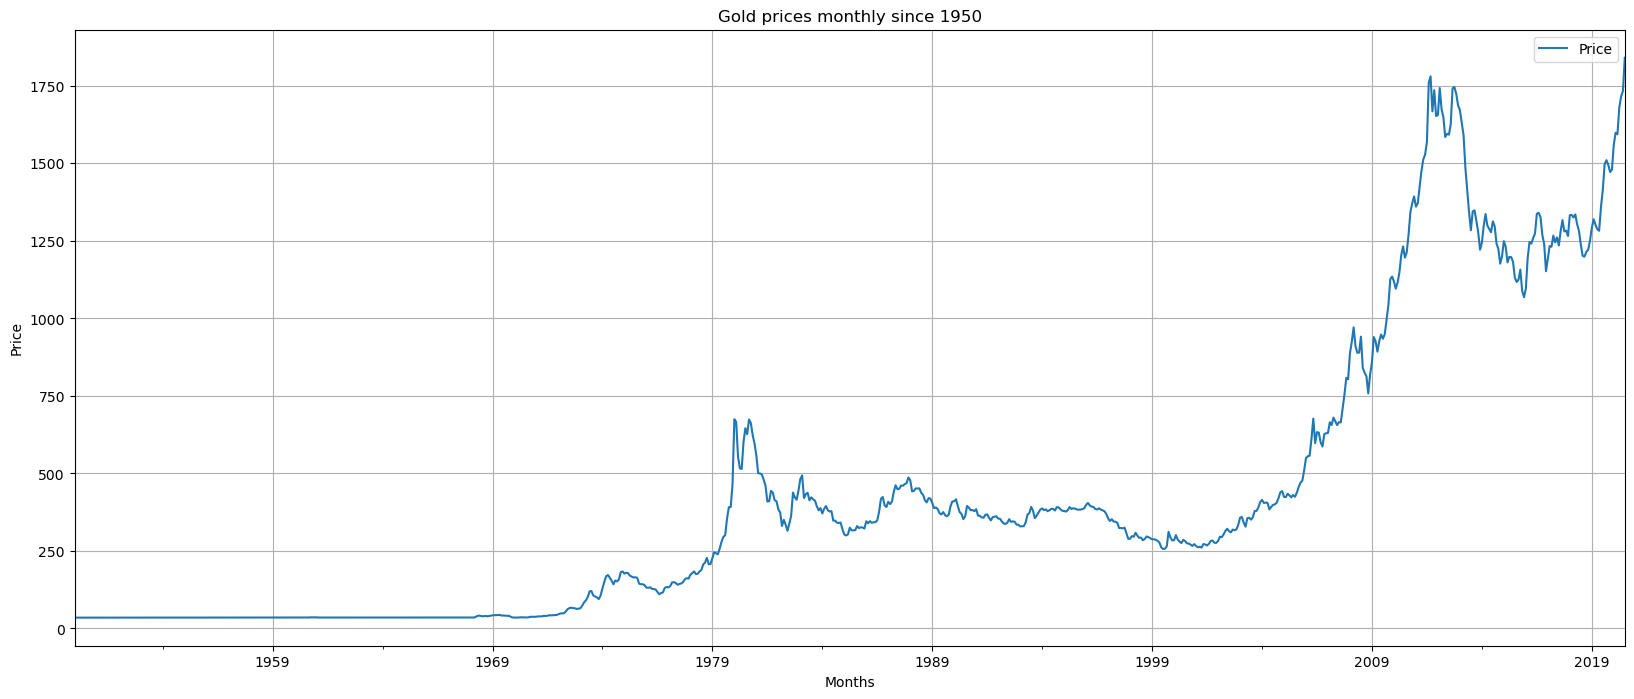

In [81]:
df.plot(figsize = (20,8))
plt.title("Gold prices monthly since 1950")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

In [83]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


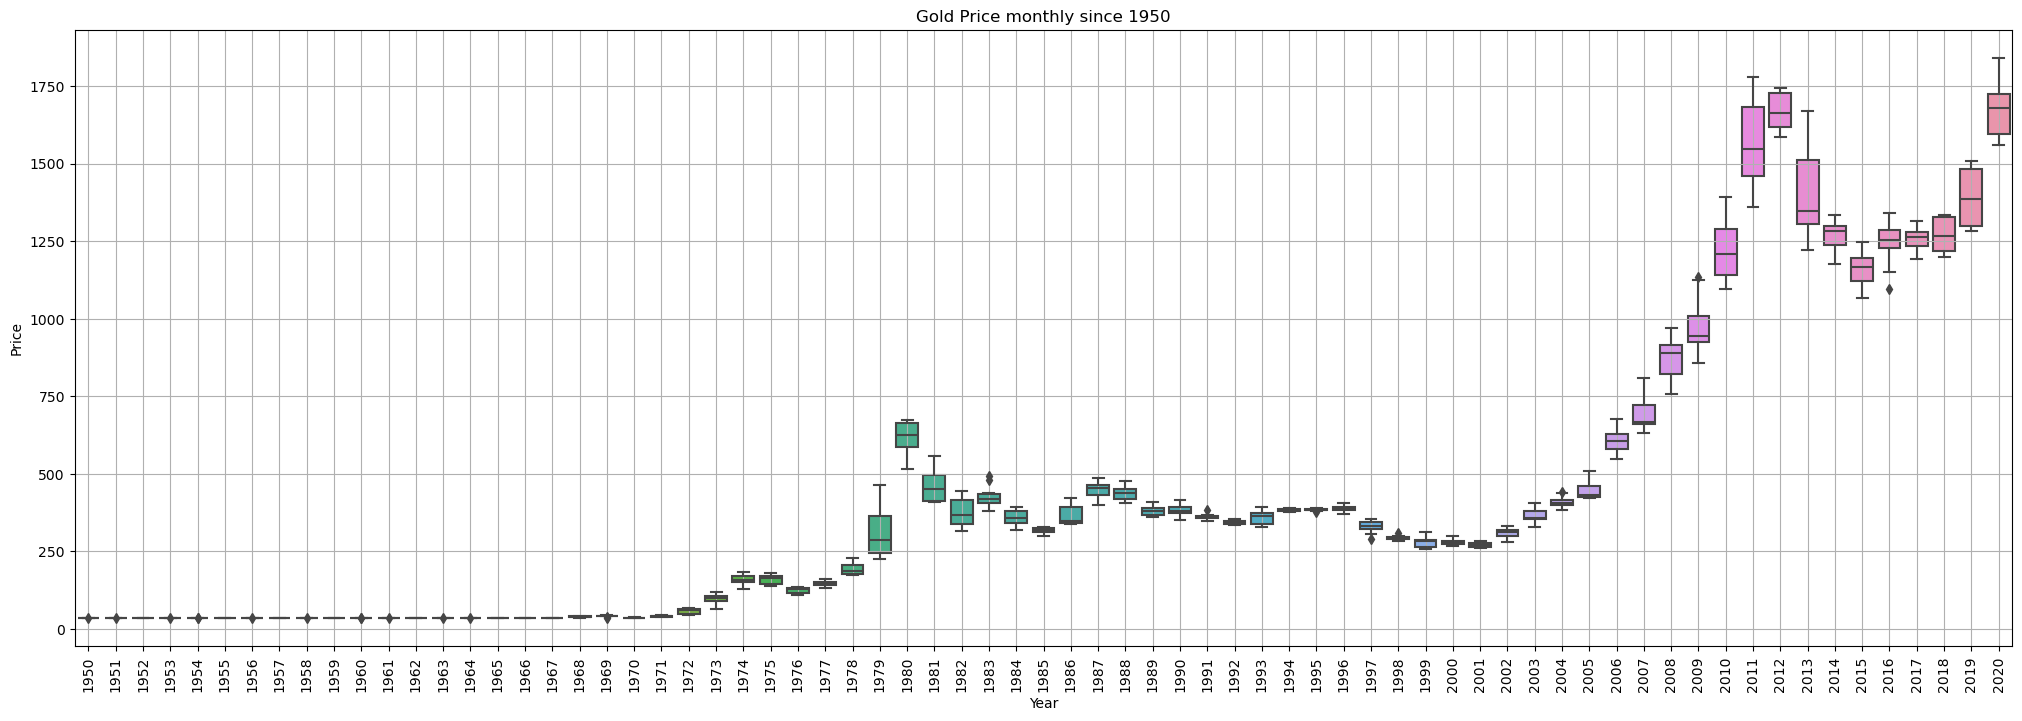

In [85]:
#Trying with another graph example
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year,y = df.values[:,0], ax=ax)
plt.title("Gold Price monthly since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.grid()

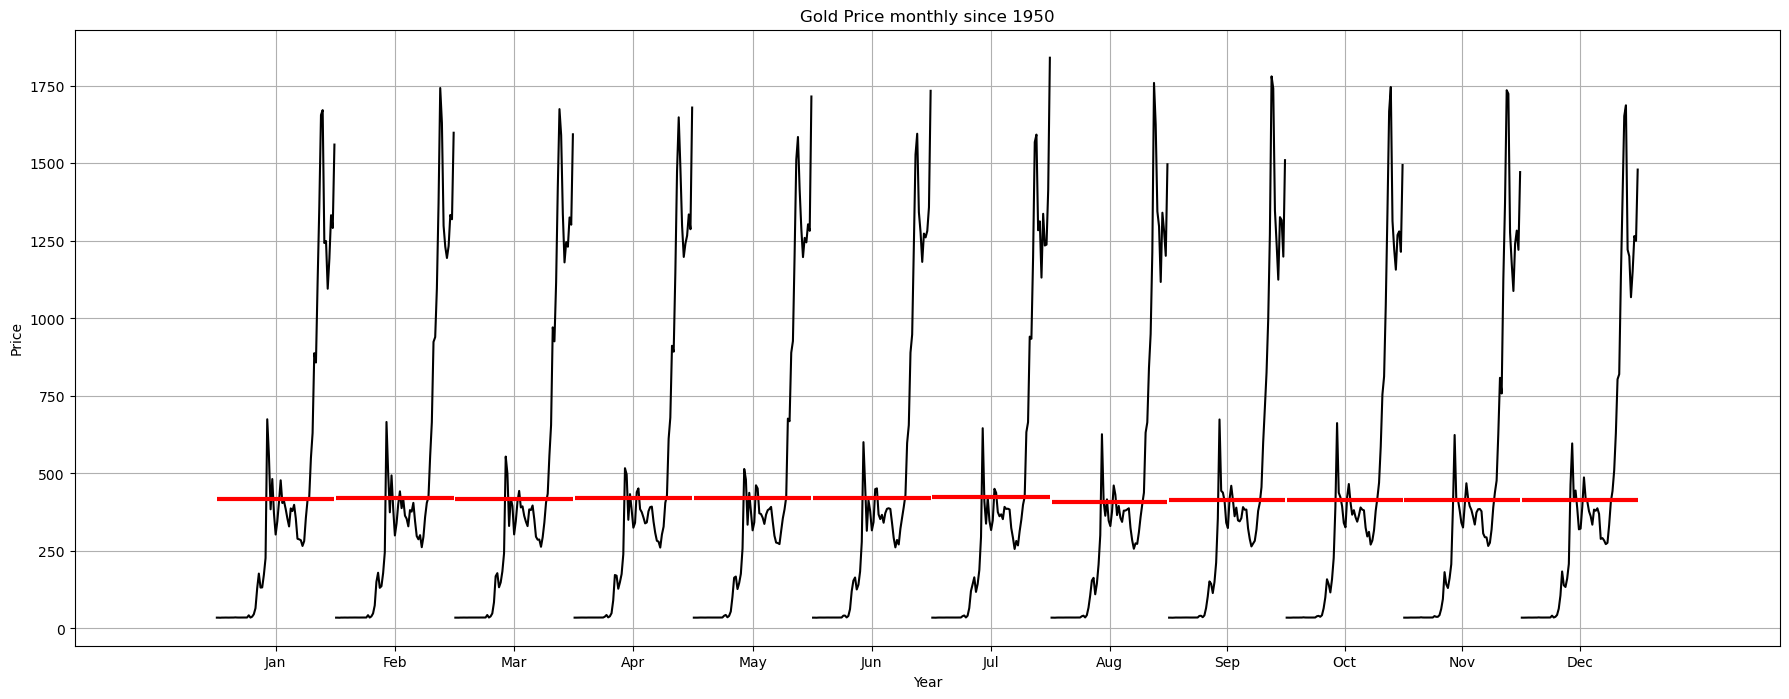

In [87]:
#Trying with another graph example
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22,8))
month_plot(df,ylabel = 'Gold Price', ax = ax)
plt.title("Gold Price monthly since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

### Calculating average gold price since 1950

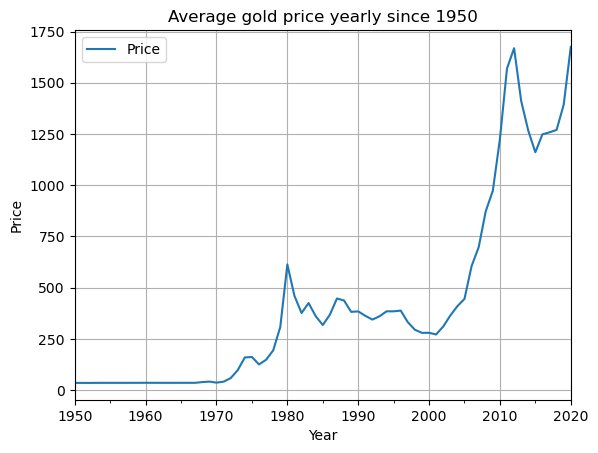

In [94]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Average gold price yearly since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

### Calculating average per quater

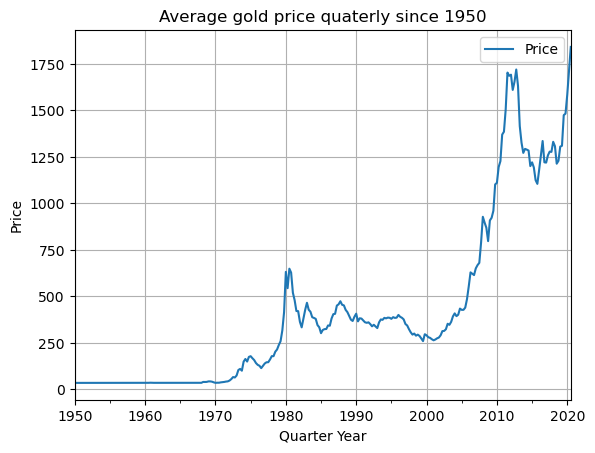

In [96]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title("Average gold price quaterly since 1950")
plt.xlabel("Quarter Year")
plt.ylabel("Price")
plt.grid()

### Calculating average gold price per decade

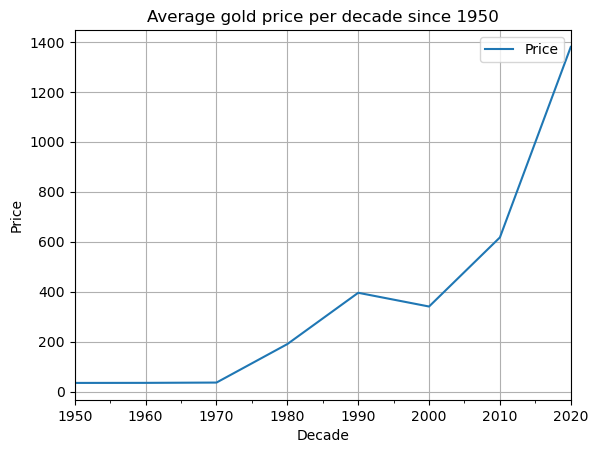

In [98]:
df_decade_sum = df.resample('10y').mean()
df_decade_sum.plot();
plt.title('Average gold price per decade since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid();

In [34]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

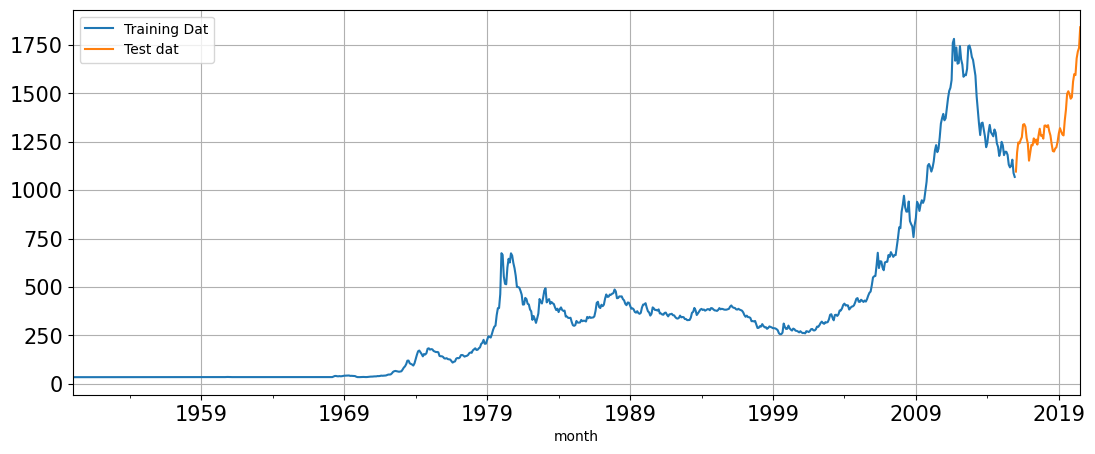

In [38]:
train["Price"].plot(figsize=(13,5), fontsize=15)
test["Price"].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(["Training Dat", "Test dat"])
plt.show()

In [40]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

### Using Linear Regression for predictive Analysis

In [51]:
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

In [53]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

In [113]:
Naive_train = train.copy()
Naive_test = test.copy()

In [117]:
Naive_test['naive'] = np.array(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

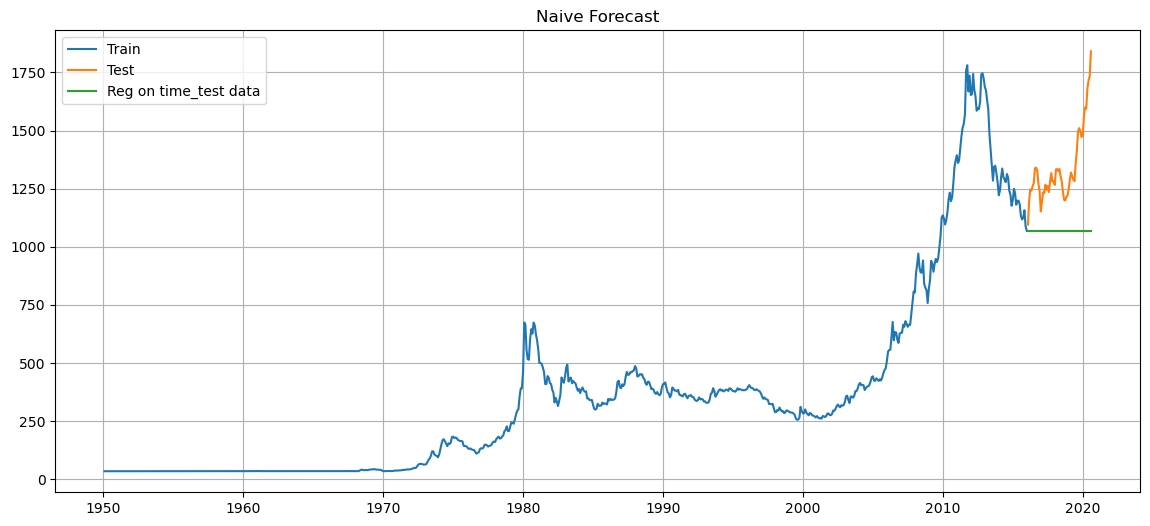

In [121]:
test_prediction_model = lr.predict(LR_test[['time']])
LR_test['Forecast'] = test_predcitions_model

plt.figure(figsize = (14,6))
plt.plot(Naive_train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Reg on time_test data')
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid();

In [77]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100, 2)

In [123]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print(" For Naive forecast on the test data MAPE is %3.3f"%(mape_model2_test), '%')

 For Naive forecast on the test data MAPE is 19.380 %


In [129]:
resultDf_2 = pd.DataFrame({'Test Mape (%)': [mape_model2_test]}, index=["NaiveModel"])
result = pd.concat([result, resultDf_2])
result

,Test Mape (%)
RegressionTime,29.76
RegressionTime,29.76
NaiveModel,29.76
NaiveModel,19.38
NaiveModel,19.38
NaiveModel,19.38


In [137]:
final_model = ExponentialSmoothing(df,trend = 'additive',seasonal = 'additive').fit(
    smoothing_level = 0.4, smoothing_trend =0.3,smoothing_seasonal = 0.6)

In [141]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [155]:
predictions = final_model.forecast(steps=len(test))

In [157]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof =1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


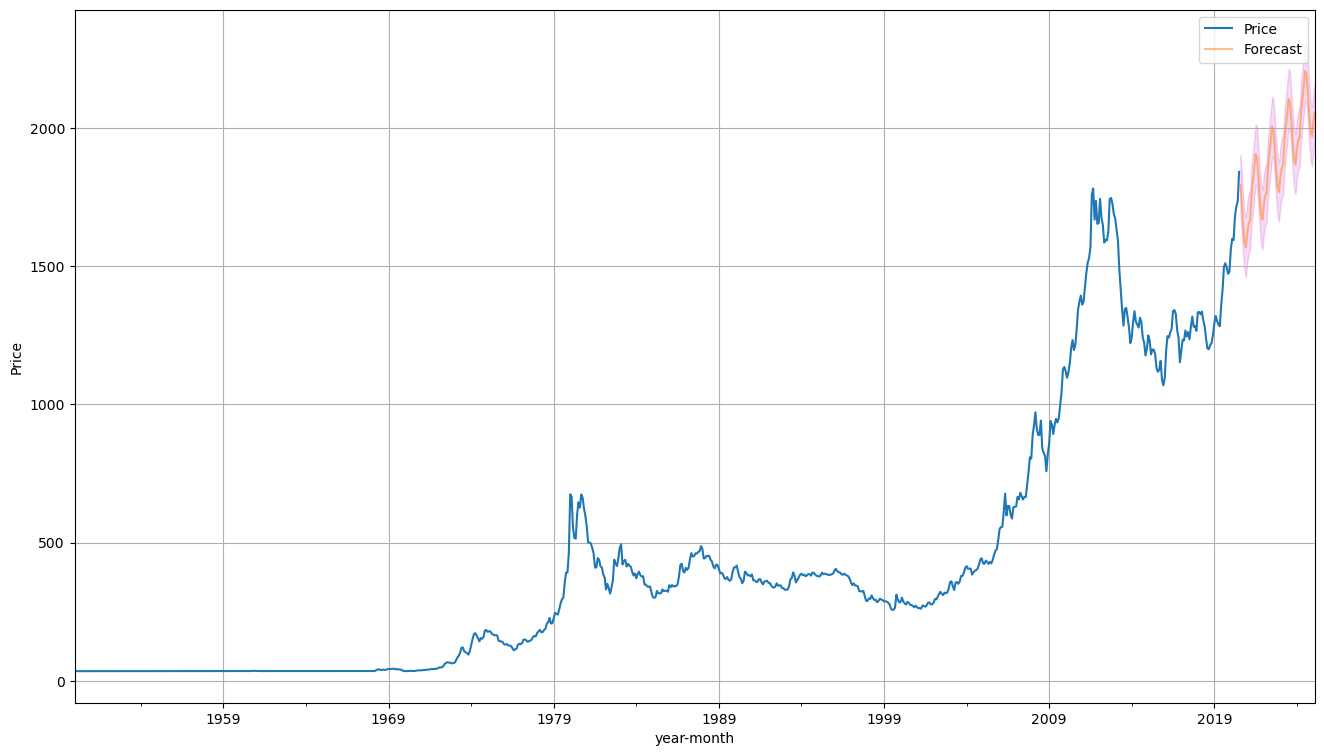

In [165]:
axis = df.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()